# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [20]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [21]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

path_file = '/content/drive/MyDrive/heart disease dataset/heart.csv'

# Muat dataset
df_raw = pd.read_csv(path_file)

# Tampilkan 5 baris pertama untuk verifikasi
print(df_raw.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [22]:
# Tampilkan informasi dasar dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [23]:
# Tampilkan informasi statistik dekriptif
df_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
# Cek Nilai Hilang
print("Cek Nilai Hilang (NaN):")
print(df_raw.isnull().sum())

Cek Nilai Hilang (NaN):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [25]:
# Cek Nilai Duplikat
print("\nJumlah Data Duplikat:")
print(df_raw.duplicated().sum())


Jumlah Data Duplikat:
723


In [26]:
# Identifikasi Jenis Fitur

# Fitur Numerik (yang akan di-scale)
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Fitur Kategorikal (yang akan di-encode)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print(f"Fitur Numerik: {numerical_features}")
print(f"Fitur Kategorikal: {categorical_features}")

Fitur Numerik: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Fitur Kategorikal: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


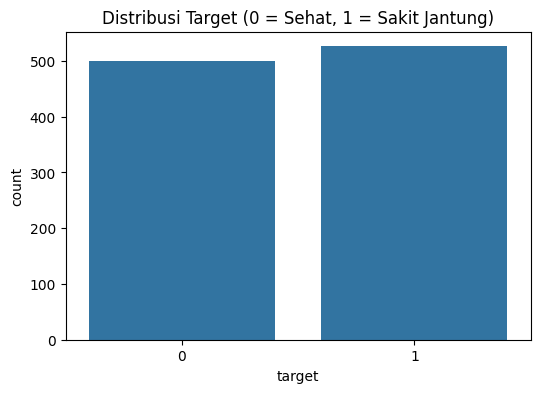

target
1    526
0    499
Name: count, dtype: int64


In [27]:
# Visualisasi Fitur Target ('target')
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_raw)
plt.title('Distribusi Target (0 = Sehat, 1 = Sakit Jantung)')
plt.show()

# Tampilan jumlah pastinya
print(df_raw['target'].value_counts())

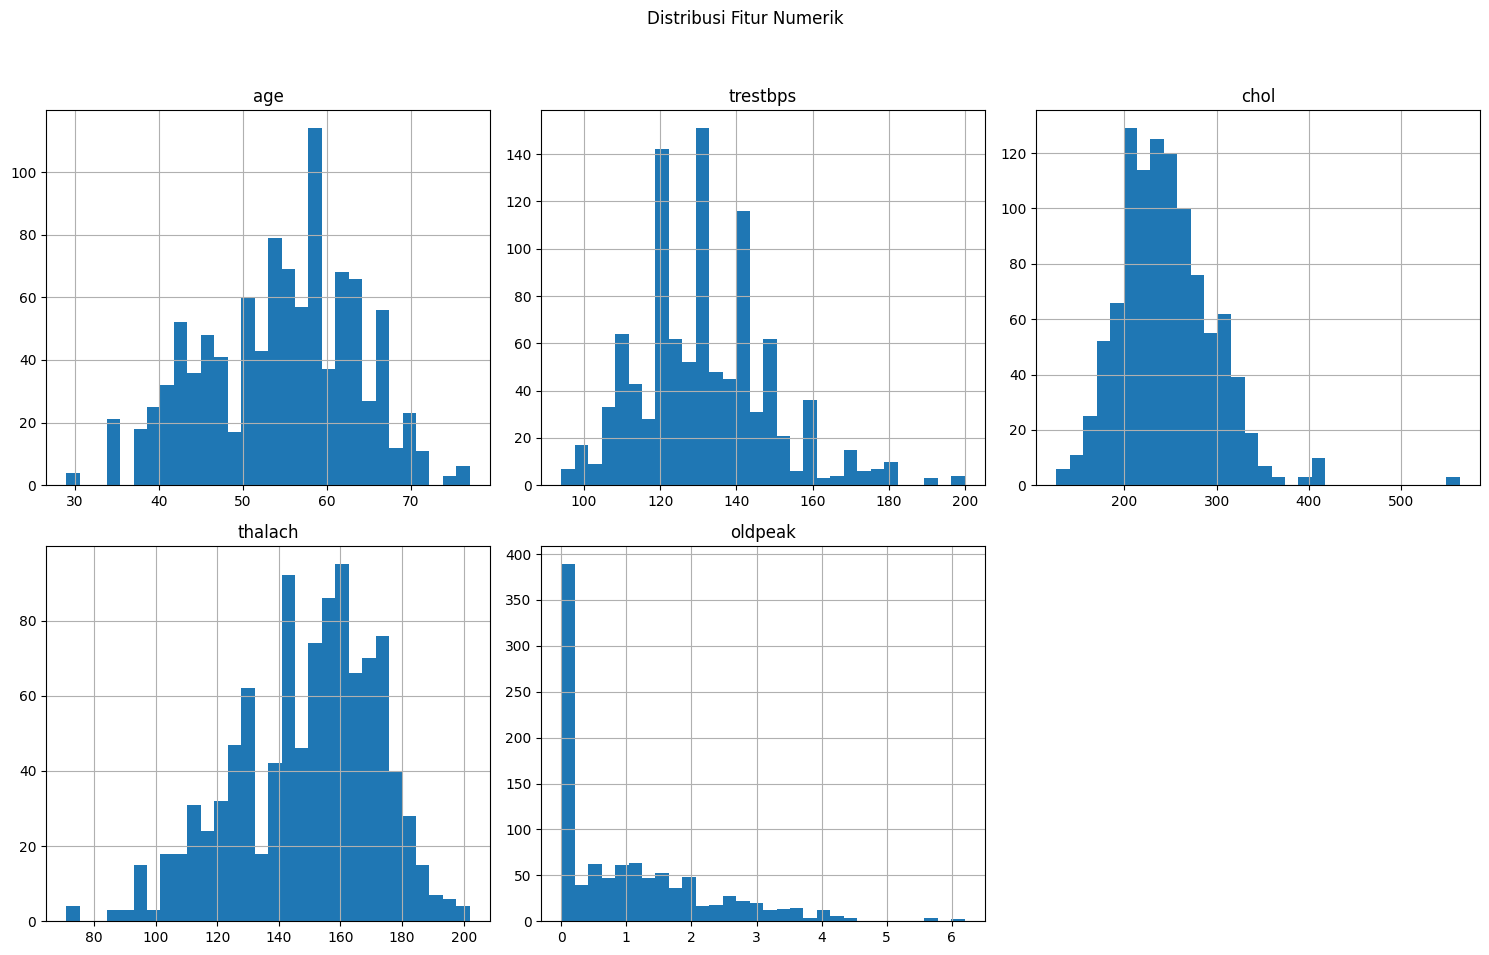

In [28]:
# Visualisasi Fitur Numerik
df_raw[numerical_features].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

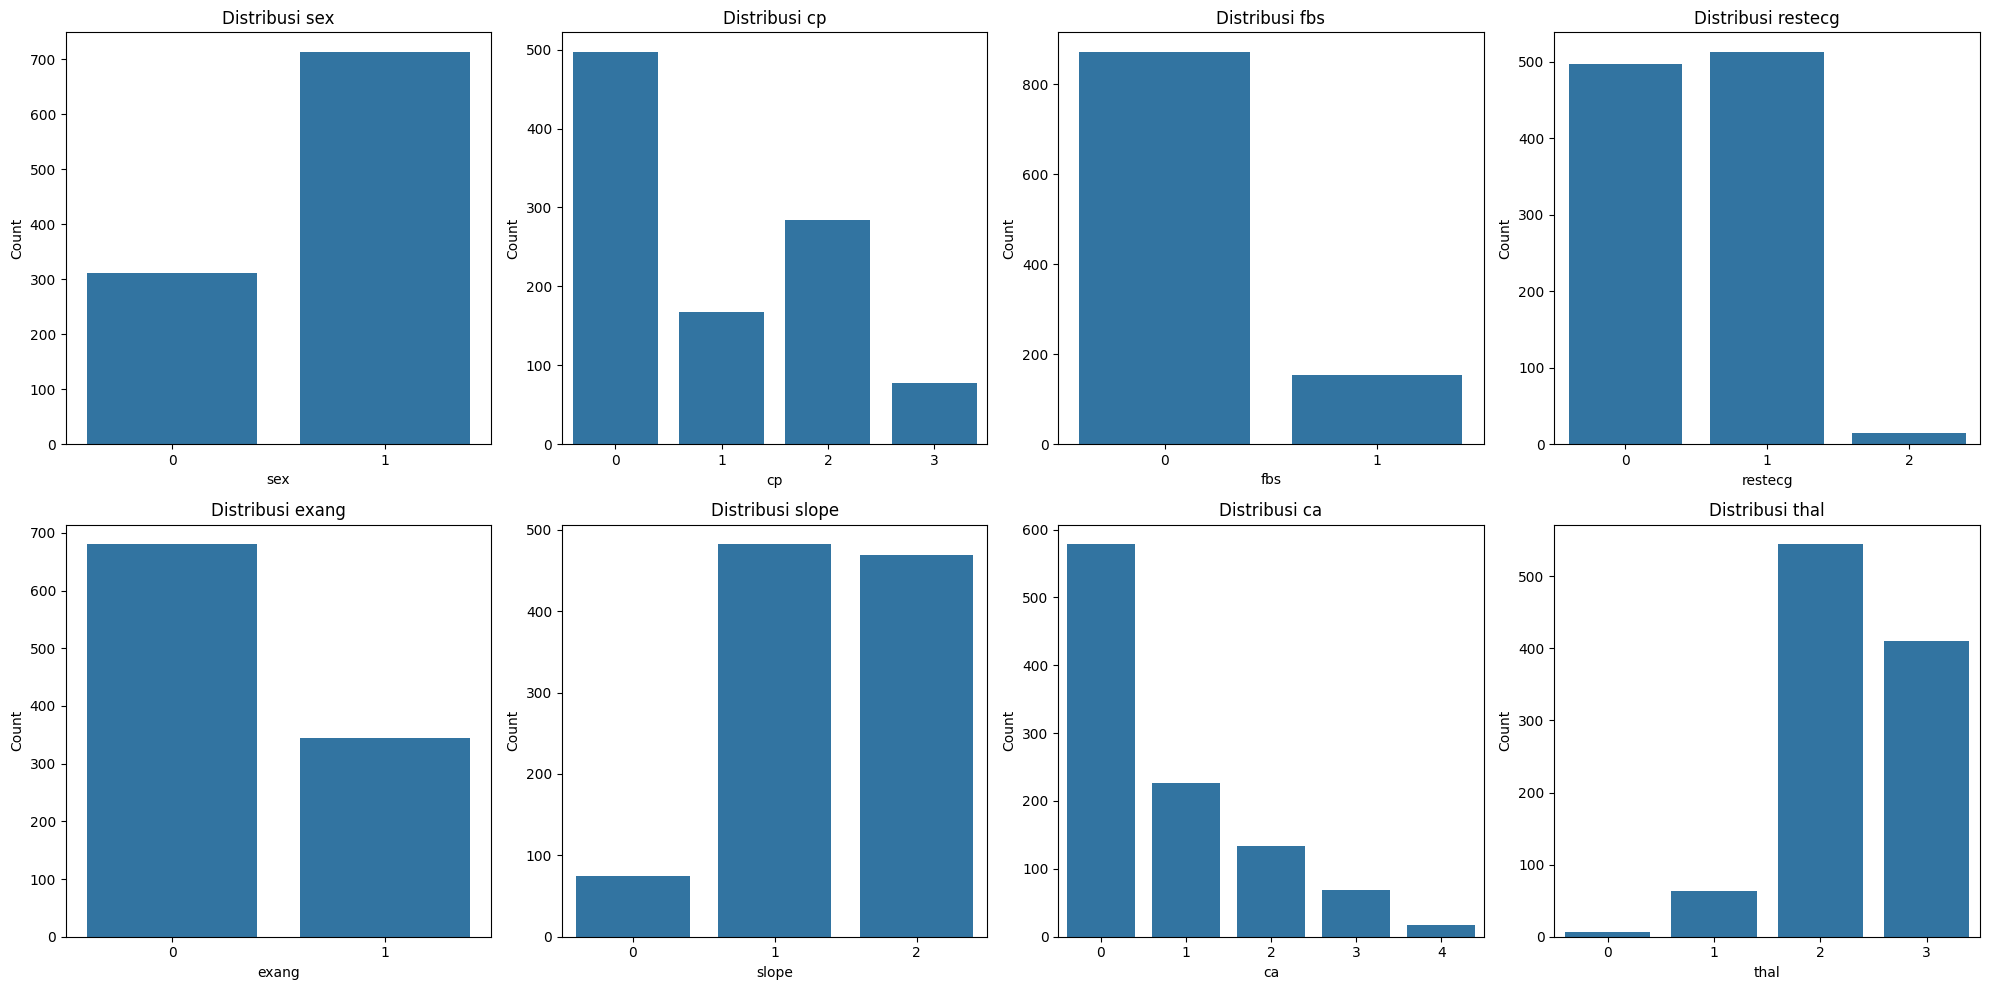

In [29]:
# Visualisasi Fitur Kategorikal
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col_name in enumerate(categorical_features):
    sns.countplot(x=col_name, data=df_raw, ax=axes[i])
    axes[i].set_title(f'Distribusi {col_name}')
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

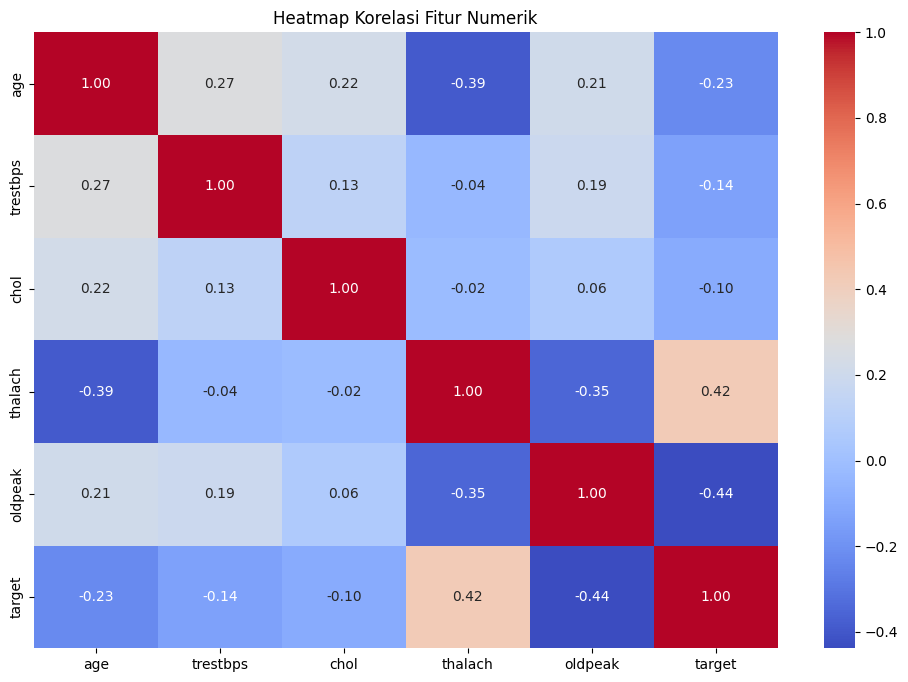

In [30]:
# Correlation Heatmap (hanya untuk fitur numerik + target)
plt.figure(figsize=(12, 8))
correlation_matrix = df_raw[numerical_features + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [31]:
df_clean = df_raw.copy()
# Menghapus data duplikat
print(f"Bentuk data (sebelum dihapus duplikat): {df_clean.shape}")
df_clean = df_clean.drop_duplicates()
print(f"Bentuk data (setelah dihapus duplikat): {df_clean.shape}")

Bentuk data (sebelum dihapus duplikat): (1025, 14)
Bentuk data (setelah dihapus duplikat): (302, 14)


In [32]:
# Memisahkan Fitur (X) dan Target (y)
X = df_clean.drop('target', axis=1)
y = df_clean['target']

print("Bentuk Fitur (X):", X.shape)
print("Bentuk Target (y):", y.shape)

Bentuk Fitur (X): (302, 13)
Bentuk Target (y): (302,)


In [33]:
# Pembagian Data (Train-Test Split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

Bentuk X_train: (241, 13)
Bentuk X_test: (61, 13)
Bentuk y_train: (241,)
Bentuk y_test: (61,)


In [34]:
# Membuat Pipeline Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Pipeline untuk data numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling
])

# Pipeline untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-Hot Encoding
])

# Gabungkan kedua pipeline menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

print("Pipeline preprocessing berhasil dibuat.")

Pipeline preprocessing berhasil dibuat.


In [35]:
# Menerapkan Pipeline ke Data

# Terapkan fit_transform ke data LATIHAN (X_train)
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Terapkan transform ke data UJI (X_test)
X_test_preprocessed = preprocessor.transform(X_test)

# Tampilkan hasil
print("Bentuk X_train setelah preprocessing:", X_train_preprocessed.shape)
print("Bentuk X_test setelah preprocessing:", X_test_preprocessed.shape)

Bentuk X_train setelah preprocessing: (241, 30)
Bentuk X_test setelah preprocessing: (61, 30)


In [36]:
# Simpan Hasil Preprocessing
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)
train_df_export = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
test_df_export = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)

# Simpan ke file CSV
output_folder = "dataset_preprocessing"
os.makedirs(output_folder, exist_ok=True)

train_file_path = os.path.join(output_folder, "train_processed.csv")
test_file_path = os.path.join(output_folder, "test_processed.csv")

train_df_export.to_csv(train_file_path, index=False)
test_df_export.to_csv(test_file_path, index=False)

print(f"Data training disimpan ke: {train_file_path}")
print(f"Data testing disimpan ke: {test_file_path}")

Data training disimpan ke: dataset_preprocessing/train_processed.csv
Data testing disimpan ke: dataset_preprocessing/test_processed.csv
